In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Tensorflow imports
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
'''https://archive-beta.ics.uci.edu/ml/datasets/NoisyOffice'''

noisy = '/content/drive/MyDrive/Datasets/simulated_noisy_images_grayscale'
clean = '/content/drive/MyDrive/Datasets/clean_images_grayscale'

In [3]:
# importing data
# noisy data
X = []
noisy_names = sorted(os.listdir(noisy))
for png_file in noisy_names:
    img = load_img(noisy + '/' + png_file, color_mode='grayscale', target_size=(420, 540))
    img = img_to_array(img).astype('float32')/255
    X.append(img)
    
X = np.array(X)

# clean data
y = []
clean_names = sorted(os.listdir(clean))
for png_file in clean_names:
    img = load_img(clean + '/' + png_file, color_mode='grayscale', target_size=(420, 540))
    img = img_to_array(img).astype('float32')/255
    y.append(img)
    
y = np.array(y)

In [4]:
clean_names[:5]

['FontLre_Clean_TE.png',
 'FontLre_Clean_TR.png',
 'FontLre_Clean_VA.png',
 'FontLrm_Clean_TE.png',
 'FontLrm_Clean_TR.png']

In [5]:
# splitting training, validation and testing names
noisy_train, noisy_valid, noisy_test = [], [], []
clean_train, clean_valid, clean_test = [], [], []

for i in noisy_names:
  i_split = i.split('_')
  if i_split[2]=='TE.png':noisy_test.append(i)
  elif i_split[2]=='TR.png':noisy_train.append(i)
  else: noisy_valid.append(i)

for i in clean_names:
  i_split = i.split('_')
  if i_split[2]=='TE.png':clean_test.append(i)
  elif i_split[2]=='TR.png':clean_train.append(i)
  else: clean_valid.append(i)

In [6]:
# splitting training, validation and testing set
X_train, X_valid, X_test = [], [], []
y_train, y_valid, y_test = [], [], []

def mapping(noisy, clean, clean_names=clean_names, nosiy_names=noisy_names, X=X, y=y):
  X_ans = []
  y_ans = []
  for i in clean:
    for j in noisy:
      i_split = i.split('_')
      j_split = j.split('_')
      if i_split[0]==j_split[0] and i_split[2]==j_split[2]:
        X_ans.append(X[noisy_names.index(j)])
        y_ans.append(y[clean_names.index(i)])
  return X_ans, y_ans

X_train, y_train = mapping(noisy_train, clean_train)
X_valid, y_valid = mapping(noisy_valid, clean_valid)
X_test, y_test = mapping(noisy_test, clean_test)

X_train, y_train = np.array(X_train), np.array(y_train)
X_valid, y_valid = np.array(X_valid), np.array(y_valid)
X_test, y_test = np.array(X_test), np.array(y_test)

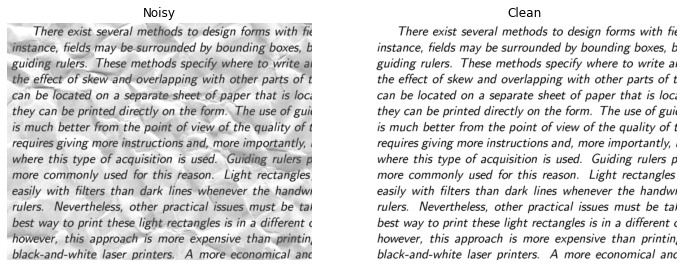

In [7]:
# plotting a sample image
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
index = np.random.randint(0, len(y_valid))

ax[0].imshow(X_train[index].reshape(420, 540), cmap=mpl.cm.gray)
ax[0].set_title('Noisy')
ax[1].imshow(y_train[index].reshape(420, 540), cmap=mpl.cm.gray)
ax[1].set_title('Clean')
for i in ax.ravel():i.set_axis_off()
plt.show()

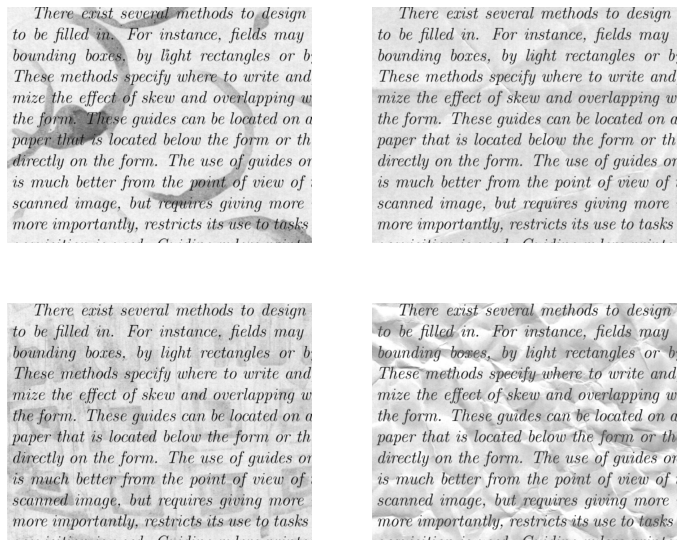

In [8]:
# All types of noises in the dataset
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].imshow(X_train[0].reshape(420, 540), cmap=mpl.cm.gray)
ax[0, 1].imshow(X_train[1].reshape(420, 540), cmap=mpl.cm.gray)
ax[1, 0].imshow(X_train[2].reshape(420, 540), cmap=mpl.cm.gray)
ax[1, 1].imshow(X_train[3].reshape(420, 540), cmap=mpl.cm.gray)

for i in ax.ravel():i.set_axis_off()
plt.show()

In [9]:
# Basic Convolution Autoencoder
model = Sequential([
    # Encoder
    Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same', input_shape=(420, 540, 1)),
    # Decoder
    Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'),
    # Output
    Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 420, 540, 8)       80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 420, 540, 8)       584       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 420, 540, 1)       73        
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
3/3 [==============================] - 21s 6s/step - loss: 0.7017 - val_loss: 0.6859
Epoch 2/10
3/3 [==============================] - 19s 6s/step - loss: 0.6822 - val_loss: 0.6703
Epoch 3/10
3/3 [==============================] - 19s 6s/step - loss: 0.6670 - val_loss: 0.6539
Epoch 4/10
3/3 [==============================] - 19s 6s/step - loss: 0.6504 - val_loss: 0.6357
Epoch 5/10
3/3 [==============================] - 19s 6s/step - loss: 0.6319 - val_loss: 0.6155
Epoch 6/10
3/3 [==============================] - 19s 6s/step - loss: 0.6114 - val_loss: 0.5932
Epoch 7/10
3/3 [==============================] - 19s 6s/step - loss: 0.5889 - val_loss: 0.5688
Epoch 8/10
3/3 [==============================] - 19s 6s/step - loss: 0.5643 - val_loss: 0.5423
Epoch 9/10
3/3 [==============================] - 19s 6s/step - loss: 0.5375 - val_loss: 0.5135
Epoch 10/10
3/3 [==============================] - 19s 6s/step - loss: 0.5084 - val_loss: 0.4829


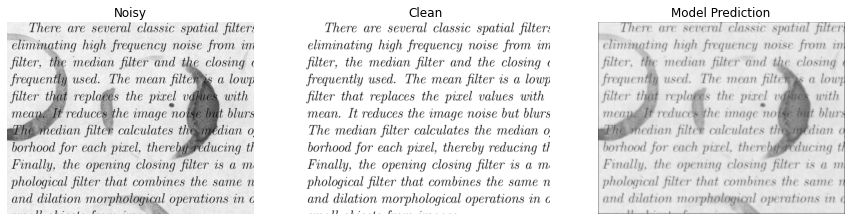

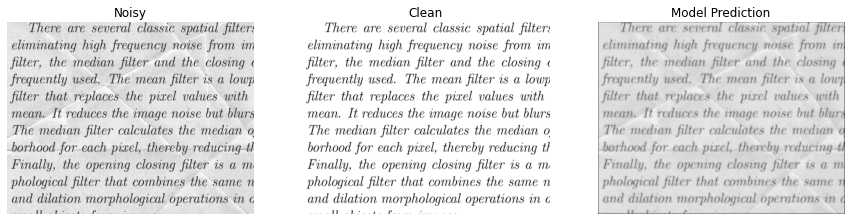

In [11]:
# plotting the prediction from the basic model
y_pred = model.predict(X_valid)
for image in range(2):
  fig, ax = plt.subplots(1, 3, figsize=(15, 12))
  ax[0].imshow(X_valid[image].reshape(420, 540), cmap=mpl.cm.gray)
  ax[1].imshow(y_valid[image].reshape(420, 540), cmap=mpl.cm.gray)
  ax[2].imshow(y_pred[image].reshape(420, 540), cmap=mpl.cm.gray)
  ax[0].set_title('Noisy')
  ax[1].set_title('Clean')
  ax[2].set_title('Model Prediction')
  for i in ax.ravel():i.set_axis_off()
  plt.show()

# Deep Model

In [12]:
# Deep Convolution Autoencoders; defining a function to make models with different optimizers
def make_model():
  model = Sequential([
      # Encoders
      Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(420, 540, 1)),
      Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'),
      Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'),
      
      # Decoders
      Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'),
      Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'),
      Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
      
      # Output Layer
      Conv2D(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same'),
  ])
  return model
adam_model = make_model()
adam_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 420, 540, 32)      320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 420, 540, 16)      4624      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 420, 540, 8)       1160      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 420, 540, 8)       584       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 420, 540, 16)      1168      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 420, 540, 32)      4640      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 420, 540, 1)      

In [13]:
# Early stopping to be used as callback when required
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [14]:
adam_model.compile(optimizer='adam', loss='binary_crossentropy')
adam_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=5)

Epoch 1/5
3/3 [==============================] - 104s 32s/step - loss: 0.6945 - val_loss: 0.6881
Epoch 2/5
3/3 [==============================] - 107s 33s/step - loss: 0.6867 - val_loss: 0.6804
Epoch 3/5
3/3 [==============================] - 103s 33s/step - loss: 0.6774 - val_loss: 0.6630
Epoch 4/5
3/3 [==============================] - 103s 33s/step - loss: 0.6561 - val_loss: 0.6164
Epoch 5/5
3/3 [==============================] - 103s 33s/step - loss: 0.5975 - val_loss: 0.5131


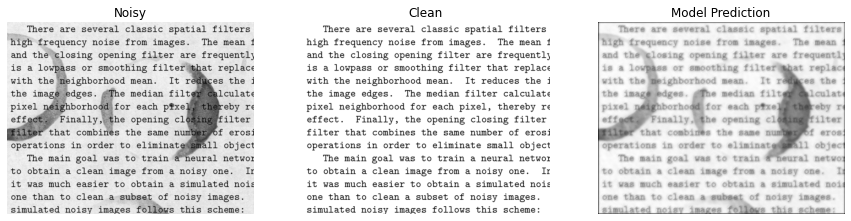

In [15]:
# plotting the prediction from the deep model with adam optimizer
y_pred = adam_model.predict(X_valid)
index = np.random.randint(0, len(y_pred))

fig, ax = plt.subplots(1, 3, figsize=(15, 12))
ax[0].imshow(X_valid[index].reshape(420, 540), cmap=mpl.cm.gray)
ax[1].imshow(y_valid[index].reshape(420, 540), cmap=mpl.cm.gray)
ax[2].imshow(y_pred[index].reshape(420, 540), cmap=mpl.cm.gray)
ax[0].set_title('Noisy')
ax[1].set_title('Clean')
ax[2].set_title('Model Prediction')
for i in ax.ravel():i.set_axis_off()

In [16]:
# RMSprop optimizer
rms_model = make_model()
rms_model.compile(optimizer='RMSprop', loss='binary_crossentropy')
rms_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=5)

Epoch 1/5
3/3 [==============================] - 104s 33s/step - loss: 0.6749 - val_loss: 0.4550
Epoch 2/5
3/3 [==============================] - 106s 34s/step - loss: 0.3772 - val_loss: 0.3062
Epoch 3/5
3/3 [==============================] - 105s 33s/step - loss: 0.3034 - val_loss: 0.2918
Epoch 4/5
3/3 [==============================] - 105s 33s/step - loss: 0.3008 - val_loss: 0.2886
Epoch 5/5
3/3 [==============================] - 103s 33s/step - loss: 0.2781 - val_loss: 0.2924


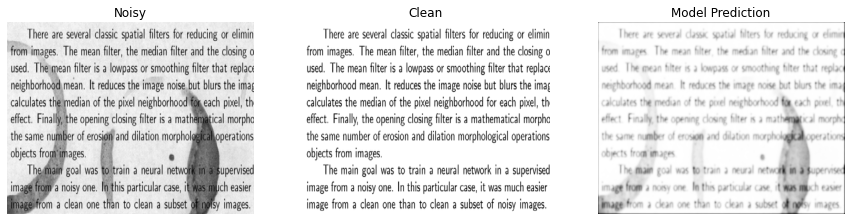

In [17]:
# plotting the prediction from the deep model with adam optimizer
y_pred = rms_model.predict(X_valid)
index = np.random.randint(0, len(y_pred))

fig, ax = plt.subplots(1, 3, figsize=(15, 12))
ax[0].imshow(X_valid[index].reshape(420, 540), cmap=mpl.cm.gray)
ax[1].imshow(y_valid[index].reshape(420, 540), cmap=mpl.cm.gray)
ax[2].imshow(y_pred[index].reshape(420, 540), cmap=mpl.cm.gray)
ax[0].set_title('Noisy')
ax[1].set_title('Clean')
ax[2].set_title('Model Prediction')
for i in ax.ravel():i.set_axis_off()

In [18]:
# SGD Optimizer
sgd_model = make_model()
sgd_model.compile(optimizer='SGD', loss='binary_crossentropy')
sgd_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=5)

Epoch 1/5
3/3 [==============================] - 104s 33s/step - loss: 0.6818 - val_loss: 0.6702
Epoch 2/5
3/3 [==============================] - 104s 33s/step - loss: 0.6674 - val_loss: 0.6568
Epoch 3/5
3/3 [==============================] - 107s 33s/step - loss: 0.6540 - val_loss: 0.6428
Epoch 4/5
3/3 [==============================] - 103s 33s/step - loss: 0.6399 - val_loss: 0.6281
Epoch 5/5
3/3 [==============================] - 104s 33s/step - loss: 0.6249 - val_loss: 0.6117


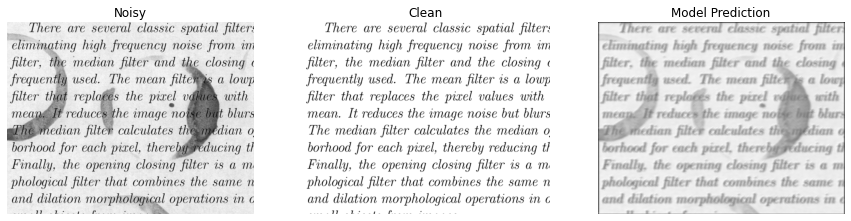

In [26]:
# plotting the prediction from the deep model with adam optimizer
y_pred = sgd_model.predict(X_valid)
index = 0#p.random.randint(0, len(y_pred))

fig, ax = plt.subplots(1, 3, figsize=(15, 12))
ax[0].imshow(X_valid[index].reshape(420, 540), cmap=mpl.cm.gray)
ax[1].imshow(y_valid[index].reshape(420, 540), cmap=mpl.cm.gray)
ax[2].imshow(y_pred[index].reshape(420, 540), cmap=mpl.cm.gray)
ax[0].set_title('Noisy')
ax[1].set_title('Clean')
ax[2].set_title('Model Prediction')
for i in ax.ravel():i.set_axis_off()

In [20]:
X_train_final = np.concatenate((X_train, X_valid))
y_train_final = np.concatenate((y_train, y_valid))

In [21]:
# Final model with RMSprop optimizer
final_model = make_model()
final_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 420, 540, 32)      320       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 420, 540, 16)      4624      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 420, 540, 8)       1160      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 420, 540, 8)       584       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 420, 540, 16)      1168      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 420, 540, 32)      4640      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 420, 540, 1)      

In [22]:
final_model.compile(optimizer='RMSprop', loss='binary_crossentropy')
final_model.fit(X_train_final, y_train_final, epochs=10,
                validation_data=(X_test, y_test))

Epoch 1/10
5/5 [==============================] - 188s 37s/step - loss: 0.5509 - val_loss: 0.3038
Epoch 2/10
5/5 [==============================] - 193s 39s/step - loss: 0.3088 - val_loss: 0.2793
Epoch 3/10
5/5 [==============================] - 188s 38s/step - loss: 0.2780 - val_loss: 0.2776
Epoch 4/10
5/5 [==============================] - 188s 37s/step - loss: 0.2551 - val_loss: 0.2251
Epoch 5/10
5/5 [==============================] - 195s 39s/step - loss: 0.2317 - val_loss: 0.2083
Epoch 6/10
5/5 [==============================] - 188s 38s/step - loss: 0.1950 - val_loss: 0.1843
Epoch 7/10
5/5 [==============================] - 188s 38s/step - loss: 0.1869 - val_loss: 0.1574
Epoch 8/10
5/5 [==============================] - 192s 38s/step - loss: 0.1574 - val_loss: 0.2080
Epoch 9/10
5/5 [==============================] - 189s 38s/step - loss: 0.1638 - val_loss: 0.1354
Epoch 10/10
5/5 [==============================] - 188s 38s/step - loss: 0.1343 - val_loss: 0.1445


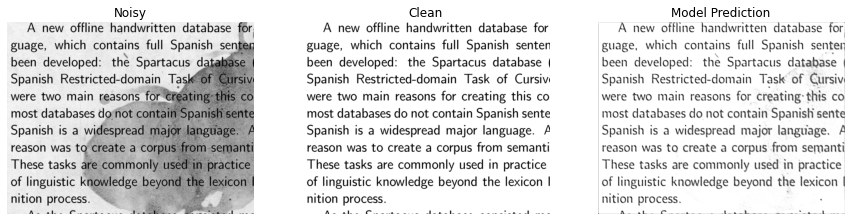

In [29]:
# plotting the prediction from the final model with adam optimizer
y_pred = final_model.predict(X_test)
index = np.random.randint(0, len(y_pred))

fig, ax = plt.subplots(1, 3, figsize=(15, 12))
ax[0].imshow(X_test[index].reshape(420, 540), cmap=mpl.cm.gray)
ax[1].imshow(y_test[index].reshape(420, 540), cmap=mpl.cm.gray)
ax[2].imshow(y_pred[index].reshape(420, 540), cmap=mpl.cm.gray)
ax[0].set_title('Noisy')
ax[1].set_title('Clean')
ax[2].set_title('Model Prediction')
for i in ax.ravel():i.set_axis_off()